# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lecture 12 ($k$-NN Classification and Missingness)

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>


---

In [3]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn as sk


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
import sklearn.metrics as met

In [4]:
df_heart = pd.read_csv('Heart.csv')
df_heart.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


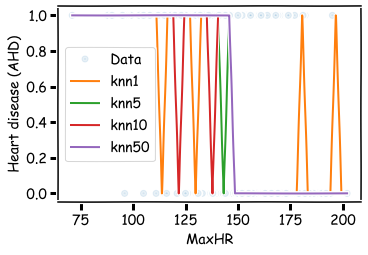

In [5]:
data_x = df_heart.MaxHR
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)


knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn50 = KNeighborsClassifier(n_neighbors=50)

knn1.fit(data_x.values.reshape(-1,1), data_y);
knn5.fit(data_x.values.reshape(-1,1), data_y);
knn10.fit(data_x.values.reshape(-1,1), data_y);
knn50.fit(data_x.values.reshape(-1,1), data_y);


fig = plt.figure()
fig.patch.set_alpha(0.0)
plt.xkcd(scale=0.1, length=0.0)
plt.gcf().subplots_adjust(bottom=0.20, left = 0.16, right=0.86)


x=np.linspace(np.min(data_x),np.max(data_x))
yhat1 = knn1.predict(x.reshape(-1,1))
yhat5 = knn5.predict(x.reshape(-1,1))
yhat10 = knn10.predict(x.reshape(-1,1))
yhat50 = knn50.predict(x.reshape(-1,1))

plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,yhat1, label='knn1')
plt.plot(x,yhat5, label='knn5')
plt.plot(x,yhat10, label='knn10')
plt.plot(x,yhat50, label='knn50')

plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")

plt.show()


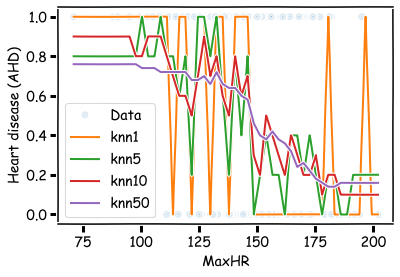

In [6]:
phat1 = knn1.predict_proba(x.reshape(-1,1))[:,1]
phat5 = knn5.predict_proba(x.reshape(-1,1))[:,1]
phat10 = knn10.predict_proba(x.reshape(-1,1))[:,1]
phat50 = knn50.predict_proba(x.reshape(-1,1))[:,1]

plt.plot(data_x, data_y, 'o' ,alpha=0.1, label='Data')
plt.plot(x,phat1, label='knn1')
plt.plot(x,phat5, label='knn5')
plt.plot(x,phat10, label='knn10')
plt.plot(x,phat50, label='knn50')

plt.legend()

plt.xlabel("MaxHR")
plt.ylabel("Heart disease (AHD)")

plt.show()

In [7]:
#two predictors

knn1 = KNeighborsClassifier(n_neighbors=1)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn10 = KNeighborsClassifier(n_neighbors=10)
knn50 = KNeighborsClassifier(n_neighbors=50)

data_x = df_heart[['MaxHR','RestBP']]
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)

knn1.fit(data_x, data_y);
knn5.fit(data_x, data_y);
knn10.fit(data_x, data_y);
knn50.fit(data_x, data_y);

print(knn1.score(data_x, data_y))
print(knn5.score(data_x, data_y))
print(knn10.score(data_x, data_y))
print(knn50.score(data_x, data_y))

0.9603960396039604
0.7128712871287128
0.7161716171617162
0.7062706270627063


In [8]:
# Don't forget to split into train and test 
# (or better yet, use cross-validation) 
# to determine what k is actually best!

## Dealing with Missingness

In [15]:
# There are some missing values to begin with
print(df_heart.shape)
print(df_heart.dropna().shape)

(303, 15)
(297, 15)


In [14]:
import numpy.random as random
random.seed(109)
n = df_heart["MaxHR"].size

# create 20 missing completely at random observations
miss = random.choice(n,20)

heart_mcar = pd.read_csv('Heart.csv')
heart_mcar.loc[miss,"MaxHR"] = np.nan
print(heart_mcar["MaxHR"][miss].head())
print(heart_mcar.dropna().shape)

262   NaN
245   NaN
245   NaN
141   NaN
75    NaN
Name: MaxHR, dtype: float64
(278, 15)


In [11]:
# create 20 missing at random observations 
miss = random.binomial(1,0.1+0.2*df_heart["Sex"],n)

heart_mar = pd.read_csv('Heart.csv')
heart_mar.loc[miss==1,"MaxHR"]=np.nan
print(heart_mar.loc[miss==1,"MaxHR"].head())
print(heart_mar.dropna().shape)

5    NaN
8    NaN
10   NaN
16   NaN
19   NaN
Name: MaxHR, dtype: float64
(223, 15)


In [12]:
# create 20 missing not at random observations 
miss = random.binomial(1,0.1*(df_heart["MaxHR"]>df_heart["MaxHR"].mean()),n)

heart_mnar = pd.read_csv('Heart.csv')
heart_mnar.loc[miss==1,"MaxHR"]=np.nan
print(heart_mnar.loc[miss==1,"MaxHR"].head())
print(heart_mnar.dropna().shape)

71    NaN
86    NaN
93    NaN
142   NaN
156   NaN
Name: MaxHR, dtype: float64
(286, 15)


In [13]:
# sklearn is not happy when you give it missing values
knn50 = KNeighborsClassifier(n_neighbors=50)

data_x = heart_mcar[['MaxHR','RestBP']]
data_y = df_heart.AHD.map(lambda x: 0 if x=='No' else 1)

knn50.fit(data_x, data_y);

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [18]:
# So let's just fill in the mean to make it happy

data_x = data_x.fillna(data_x.mean())

knn50.fit(data_x, data_y);